# Data Visualization
* In this notebook we will generate visualization of the data to get initial knowledge of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set()

In [2]:
data_dir = r'..\data\raw\\'
file_name = data_dir+'data.csv'
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,index,kn,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,gamma,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1,label
0,0,0,1611,384,156,0.0148,0.0050,877.87,1000.33,18.97,0.006588,9.55,0.1074,147,0.0948,1.1074,166,0.1105,A
1,1,1,1611,384,156,0.0148,0.0050,791.04,1000.33,18.97,0.006588,9.55,0.1074,147,0.0948,1.1074,166,0.1105,A
2,2,2,1730,311,164,0.0128,0.0049,747.53,1106.81,26.60,0.010000,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A
3,3,3,1730,311,164,0.0128,0.0049,791.04,1106.81,26.60,0.010000,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A
4,4,4,1396,332,102,0.0123,0.0051,700.26,1104.93,28.55,0.010000,25.33,0.1057,144,0.0668,1.0654,156,0.0470,A


In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df.describe()

,index,kn,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,gamma,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,478.062432,1532.323111,349.559693,147.462212,0.013465,0.005237,798.505936,1094.907306,28.355926,0.008949,28.524392,0.103154,184.520263,0.100294,0.470691,194.163198,0.094877
std,303.942071,296.294872,30.235062,28.775464,0.000870,0.001027,47.445407,58.041625,11.561912,0.001287,21.241079,0.046437,75.007338,0.043083,0.323631,86.367906,0.050265
min,0.000000,1000.000000,300.000000,100.000000,0.012000,0.004000,700.260000,1000.330000,10.140000,0.006498,2.700000,0.020400,13.000000,0.043300,0.021500,2.000000,0.012700
25%,228.000000,1295.000000,321.000000,123.000000,0.012700,0.004400,778.460000,1041.510000,18.580000,0.007727,10.300000,0.065800,131.000000,0.069700,0.101700,133.000000,0.057800
50%,456.000000,1527.000000,350.000000,145.000000,0.013400,0.004900,791.040000,1090.750000,26.600000,0.010000,21.500000,0.102100,175.000000,0.086700,0.467500,180.000000,0.086900
75%,684.000000,1799.000000,377.000000,172.000000,0.014300,0.005800,827.900000,1143.460000,38.430000,0.010000,44.900000,0.134700,226.000000,0.120700,0.756100,242.000000,0.118500
max,1240.000000,1999.000000,399.000000,199.000000,0.015000,0.008000,898.950000,1199.690000,49.960000,0.010000,85.200000,0.235300,415.000000,0.264500,1.141300,462.000000,0.252600


# Labels
The label of each row contains information about the final position of intruder.
* A : Intruder at the top of bed system
* B : Intruder at the midle of bed system
* C : Intruder at the bottom of bed system

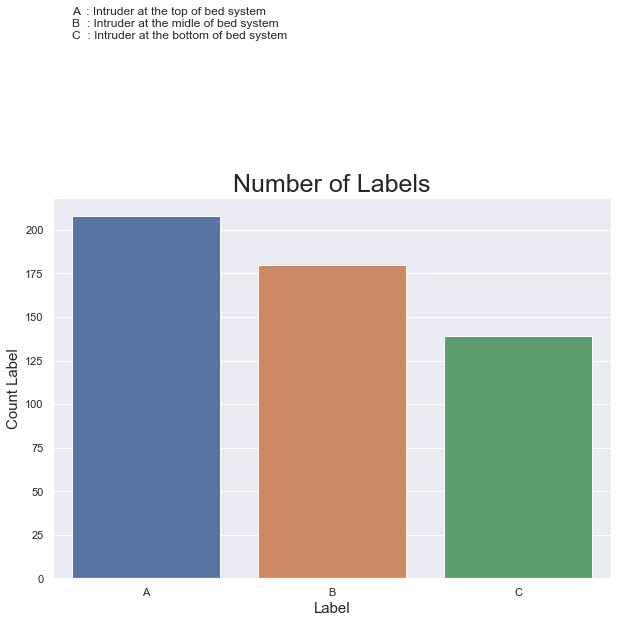

In [30]:
fig_dir = r'..\result\figure\\'
fig_title = 'Number of Labels'

plt.figure(figsize=(10,7))
sns.countplot(data=df, x='label')
plt.title(fig_title, fontsize=25)
plt.xlabel('Label', fontsize=15)
plt.ylabel('Count Label', fontsize=15)
plt.text(x=-0.4,y=310,s='A  : Intruder at the top of bed system\nB  : Intruder at the midle of bed system\nC  : Intruder at the bottom of bed system', horizontalalignment='left')

plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

# Effect of $\Gamma$ to the Intruder Final Position

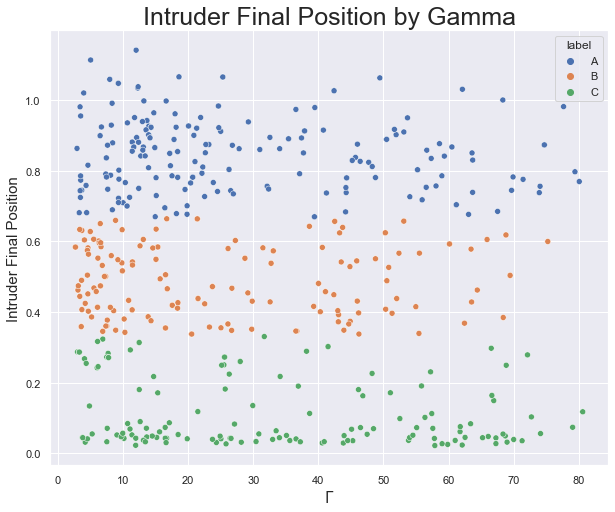

In [31]:
fig_title = 'Intruder Final Position by Gamma'

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='zint_f', x='gamma', hue='label')
plt.title(fig_title, fontsize=25)
plt.ylabel('Intruder Final Position', fontsize=15)
plt.xlabel('$\\Gamma$', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

# Distribution of Frequency and Amplitude

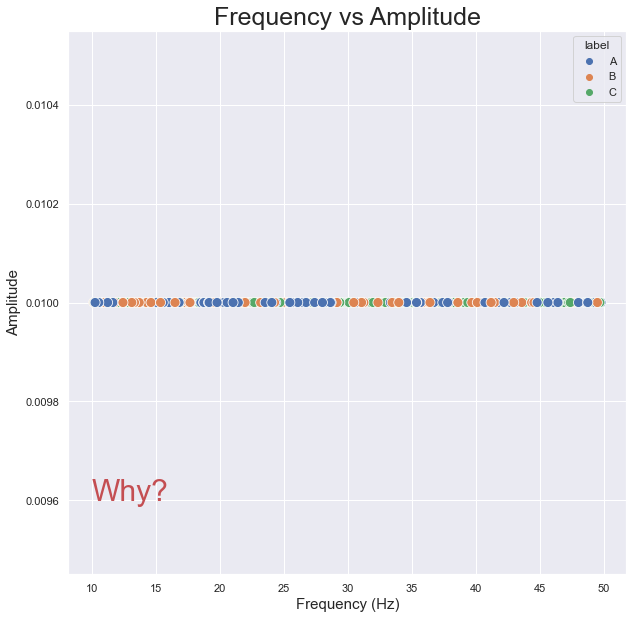

In [32]:
fig_title = 'Frequency vs Amplitude'

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='freq', y='amp', hue='label', s=100)
plt.title(fig_title, fontsize=25)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.text(10,0.0096,s="Why?", fontsize=30, color='r')
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

In [33]:
df['f2'] = df['freq']*df['freq']
df

<ipython-input-33-20a9dfc61b3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f2'] = df['freq']*df['freq']


,index,kn,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,gamma,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1,label,f2
2,2,1730,311,164,0.0128,0.0049,747.53,1106.81,26.60,0.01,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A,707.5600
3,3,1730,311,164,0.0128,0.0049,791.04,1106.81,26.60,0.01,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A,707.5600
4,4,1396,332,102,0.0123,0.0051,700.26,1104.93,28.55,0.01,25.33,0.1057,144,0.0668,1.0654,156,0.0470,A,815.1025
5,5,1396,332,102,0.0123,0.0051,791.04,1104.93,28.55,0.01,25.33,0.1057,144,0.0668,1.0654,156,0.0470,A,815.1025
8,8,1737,377,124,0.0131,0.0052,783.82,1181.97,18.01,0.01,9.29,0.1010,165,0.0815,1.0475,185,0.0599,A,324.3601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1229,1539,306,107,0.0138,0.0041,752.43,1179.21,12.42,0.01,4.68,0.2270,104,0.0463,0.4025,94,0.0150,B,154.2564
908,1233,1982,325,100,0.0133,0.0051,791.36,1021.85,42.22,0.01,51.69,0.1356,90,0.0671,0.9172,102,0.0346,A,1782.5284
909,1234,1909,321,165,0.0135,0.0042,710.95,1135.35,36.43,0.01,39.29,0.1162,87,0.0715,0.4162,85,0.0400,B,1327.1449
910,1237,1673,318,174,0.0134,0.0040,782.41,1054.35,35.38,0.01,37.72,0.1084,44,0.0740,0.8505,30,0.1597,A,1251.7444


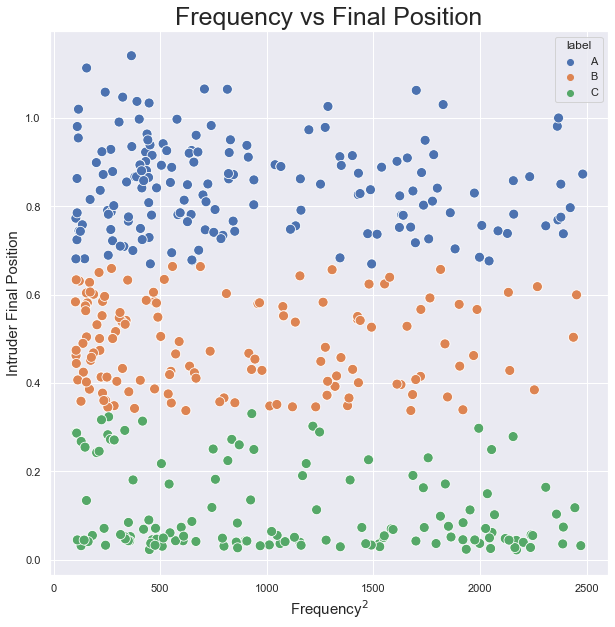

In [34]:
fig_title = 'Frequency vs Final Position'

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='f2', y='zint_f', hue='label', s=100)
plt.title(fig_title, fontsize=25)
plt.xlabel('Frequency$^2$', fontsize=15)
plt.ylabel('Intruder Final Position', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

# Distribution of Normal Stiffness ($k_n$) and Damping Coefficient ($\gamma_n$)

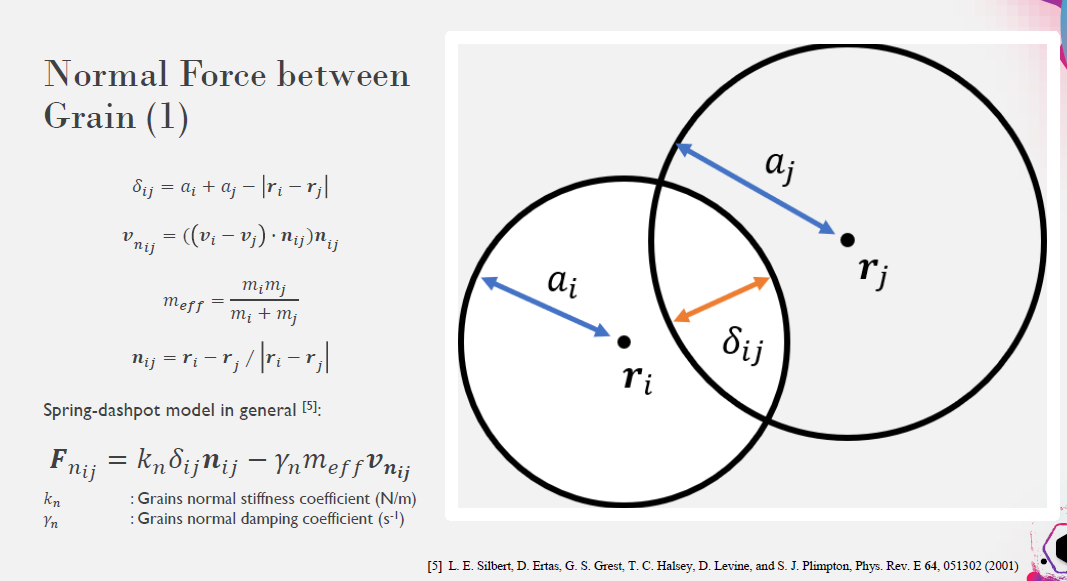

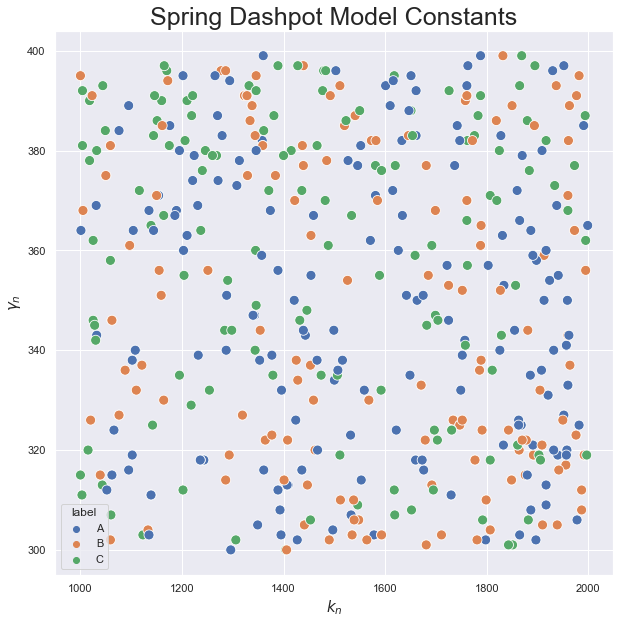

In [35]:
fig_title = 'Spring Dashpot Model Constants'

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='kn', y='gn', hue='label', s=100)
plt.title(fig_title, fontsize=25)
plt.xlabel('$k_n$', fontsize=15)
plt.ylabel('$\gamma_n$', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

# Intruder and Bed Density Comparison

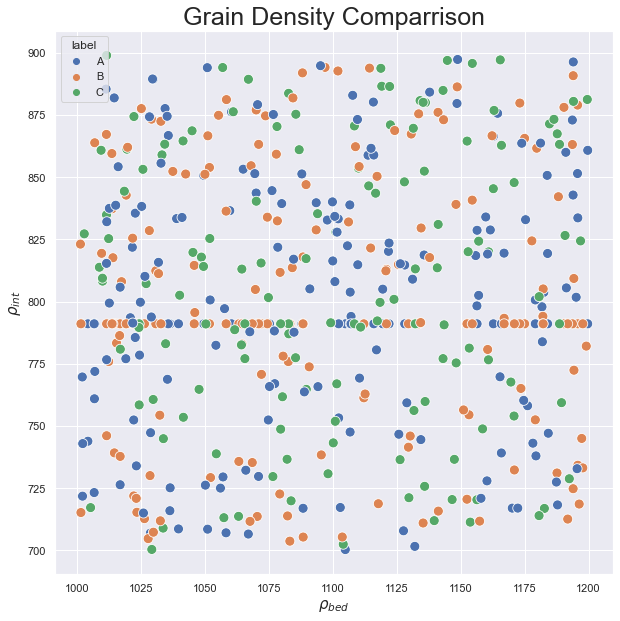

In [36]:
fig_title = 'Grain Density Comparrison'

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='rho_bed', y='rho_int', hue='label', s=100)
plt.title(fig_title, fontsize=25)
plt.xlabel('$\\rho_{bed}$', fontsize=15)
plt.ylabel('$\\rho_{int}$', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

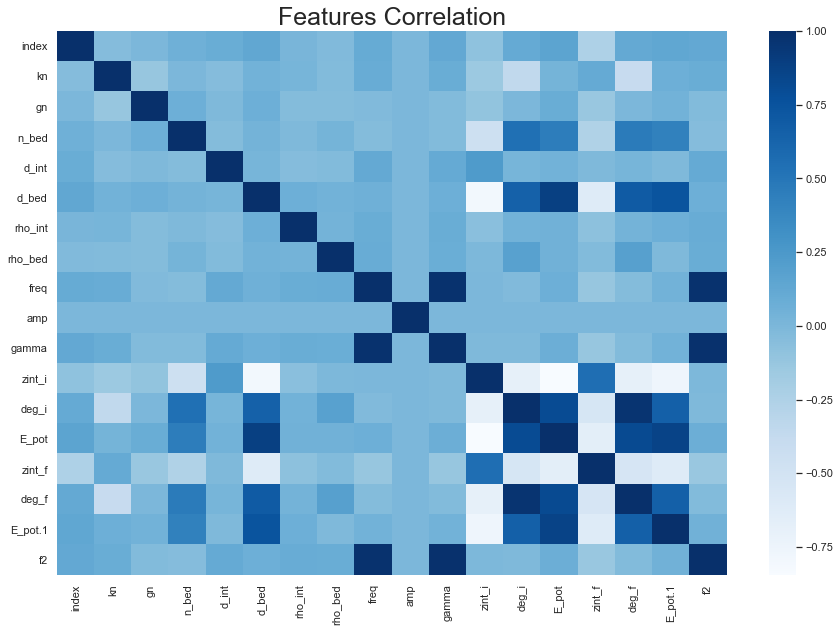

In [37]:
fig_title = 'Features Correlation'

plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap='Blues')
plt.title(fig_title, fontsize=25)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

In [38]:
from mpl_toolkits import mplot3d
from math import pi

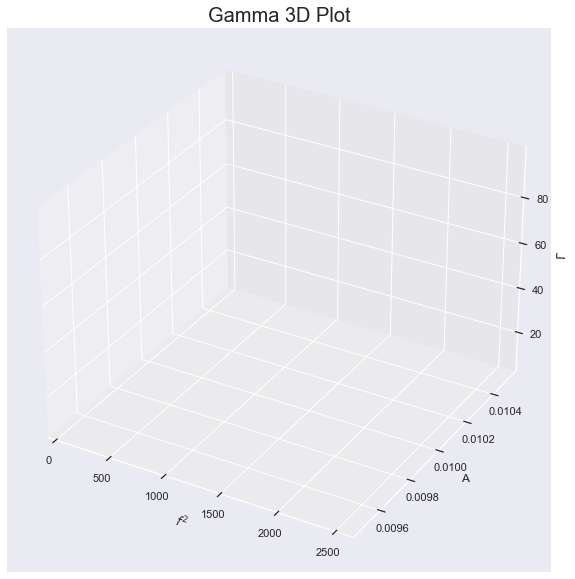

In [39]:
fig_title = 'Gamma 3D Plot'

def gamma(x,y):
    return (4*pi**2)*x*y/9.8

x = df.freq**2
y = df.amp

X,Y = np.meshgrid(x,y)

Z = gamma(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set(xlabel='$f^2$', ylabel='A', zlabel='$\Gamma$')
plt.title(fig_title, fontsize=20 )
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

In [21]:
dfA = df.loc[df.label=='A']
dfB = df.loc[df.label=='B']
dfC = df.loc[df.label=='C']

In [ ]:
def gamma(x,y):
    X = x*x
    Y = y
    X,Y = np.meshgrid(x,y)
    Z = (4*pi**2)*X*Y/9.8
    return X,Y,Z




In [29]:
df = df.loc[df.amp==0.01]
df

,index,kn,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,gamma,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1,label,f2
2,2,1730,311,164,0.0128,0.0049,747.53,1106.81,26.60,0.01,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A,707.5600
3,3,1730,311,164,0.0128,0.0049,791.04,1106.81,26.60,0.01,18.60,0.0946,183,0.0897,1.0659,180,0.1010,A,707.5600
4,4,1396,332,102,0.0123,0.0051,700.26,1104.93,28.55,0.01,25.33,0.1057,144,0.0668,1.0654,156,0.0470,A,815.1025
5,5,1396,332,102,0.0123,0.0051,791.04,1104.93,28.55,0.01,25.33,0.1057,144,0.0668,1.0654,156,0.0470,A,815.1025
8,8,1737,377,124,0.0131,0.0052,783.82,1181.97,18.01,0.01,9.29,0.1010,165,0.0815,1.0475,185,0.0599,A,324.3601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1229,1539,306,107,0.0138,0.0041,752.43,1179.21,12.42,0.01,4.68,0.2270,104,0.0463,0.4025,94,0.0150,B,154.2564
908,1233,1982,325,100,0.0133,0.0051,791.36,1021.85,42.22,0.01,51.69,0.1356,90,0.0671,0.9172,102,0.0346,A,1782.5284
909,1234,1909,321,165,0.0135,0.0042,710.95,1135.35,36.43,0.01,39.29,0.1162,87,0.0715,0.4162,85,0.0400,B,1327.1449
910,1237,1673,318,174,0.0134,0.0040,782.41,1054.35,35.38,0.01,37.72,0.1084,44,0.0740,0.8505,30,0.1597,A,1251.7444


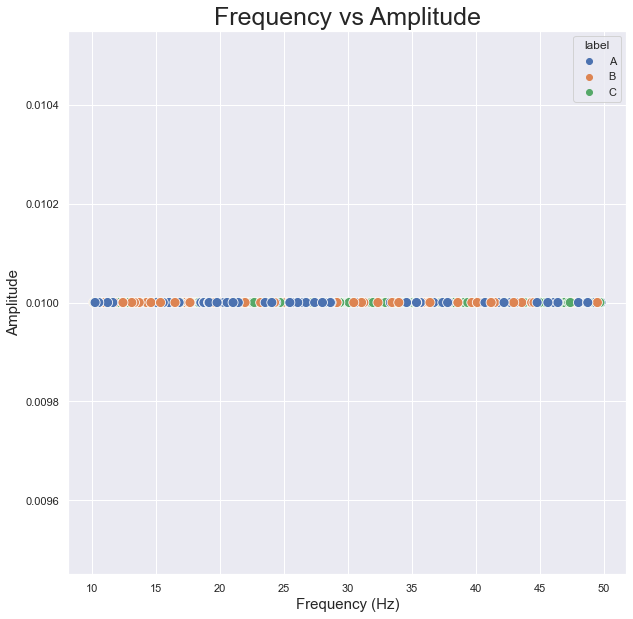

In [28]:
fig_title = 'Frequency vs Amplitude'

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_, x='freq', y='amp', hue='label', s=100)
plt.title(fig_title, fontsize=25)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()